In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
eda = pd.read_excel('TITANIC.xlsx')

In [3]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
eda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


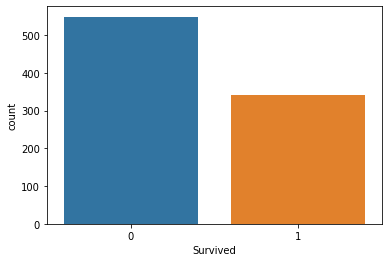

In [6]:
sns.countplot(x='Survived',data=eda)

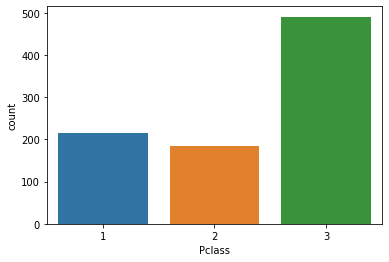

In [7]:
sns.countplot(x='Pclass',data=eda)

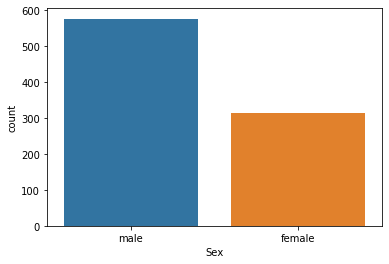

In [8]:
sns.countplot(x='Sex',data=eda)

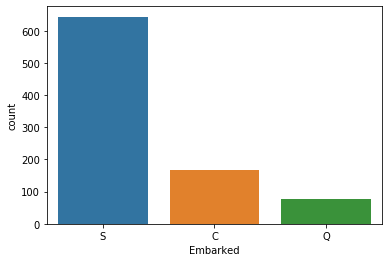

In [9]:
sns.countplot(x='Embarked',data=eda)

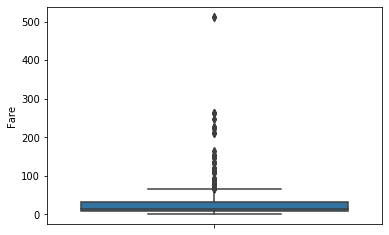

In [10]:
sns.boxplot(y='Fare',data=eda)

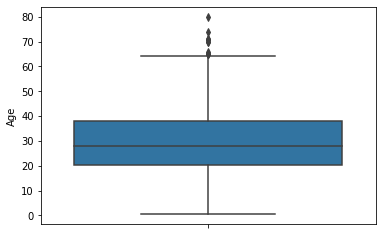

In [11]:
sns.boxplot(y='Age',data=eda)

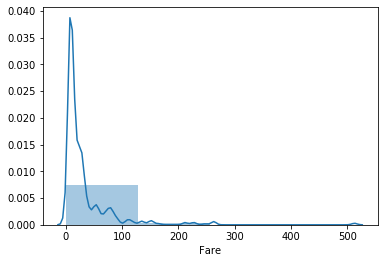

In [12]:
sns.distplot(eda['Fare'],bins=4)

C:\Users\Abhishek Palrecha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Abhishek Palrecha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Abhishek Palrecha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Abhishek Palrecha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


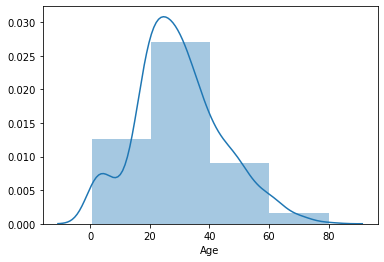

In [13]:
sns.distplot(eda['Age'],bins=4)

Text(0, 0.5, 'Fare')

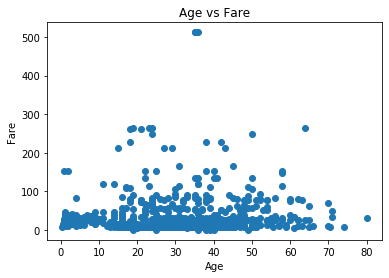

In [14]:
plt.scatter(eda['Age'],eda['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

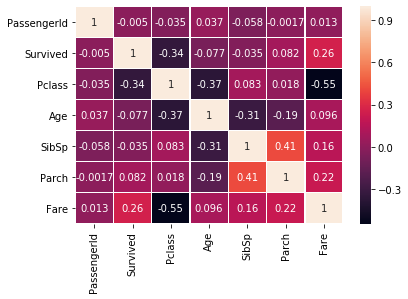

In [15]:
sns.heatmap(eda.corr(),annot=True,linewidth=0.5)

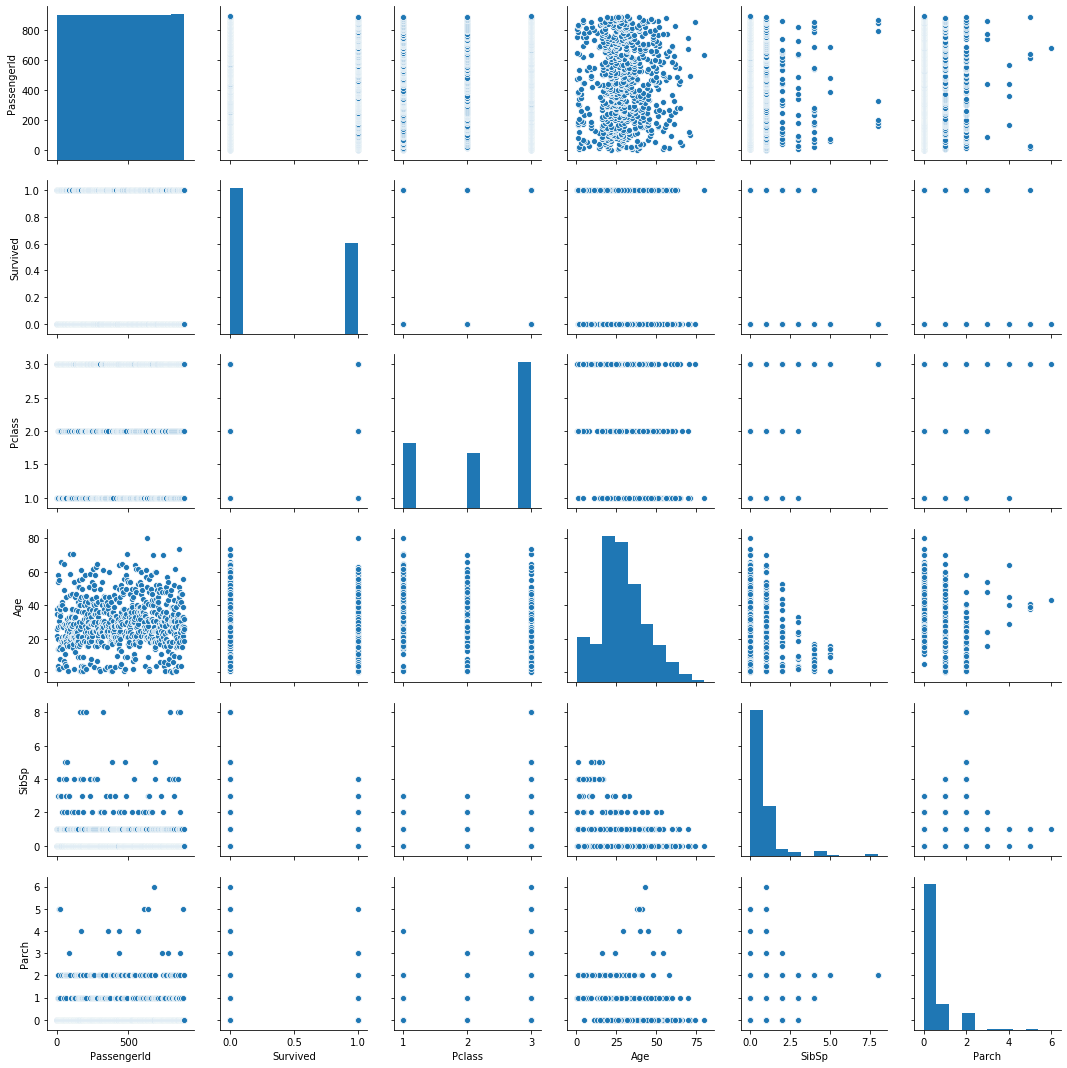

In [16]:
eda_cont=eda.iloc[:,:-3]
eda_cont
sns.pairplot(eda_cont)

In [17]:
counts=eda.groupby(['Survived','Pclass'],axis=0)
counts.size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [18]:
counts=eda.groupby(['Pclass','Sex'],axis=0)
counts.size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [19]:
counts=eda.groupby(['Sex','SibSp'],axis=0)
counts.size()

Sex     SibSp
female  0        174
        1        106
        2         13
        3         11
        4          6
        5          1
        8          3
male    0        434
        1        103
        2         15
        3          5
        4         12
        5          4
        8          4
dtype: int64

In [20]:
counts=eda.groupby(['Survived','Parch'],axis=0)
counts.size()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
dtype: int64

In [21]:
counts=eda.groupby(['Survived','Embarked'],axis=0)
counts.size()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

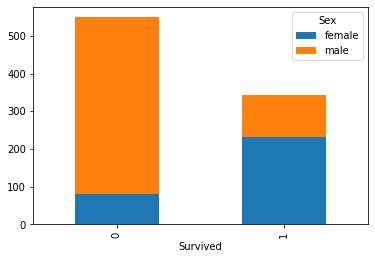

In [22]:
pd.crosstab(eda['Survived'],eda['Sex']).plot(kind='bar',stacked=True)

In [23]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [24]:
eda.isnull().values.any()

True

In [25]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002207EA322B0>]],
      dtype=object)

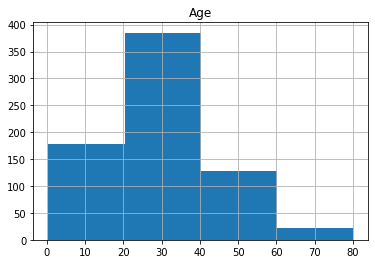

In [26]:
eda.hist(column='Age',bins=4)

In [27]:
eda.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [28]:
eda

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [29]:
eda['Embarked']=eda['Embarked'].fillna(value=str(eda['Embarked'].mode()))

In [30]:
eda['Age']=eda['Age'].fillna(value=eda['Age'].median())

In [31]:
eda.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

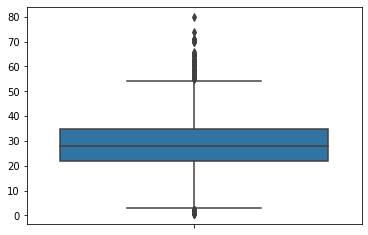

In [32]:
sns.boxplot(y=['Age'],data=eda)

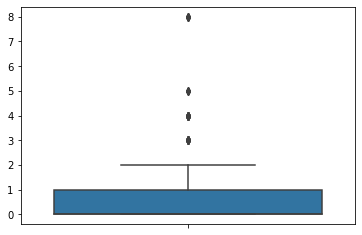

In [33]:
sns.boxplot(y=['SibSp'],data=eda)

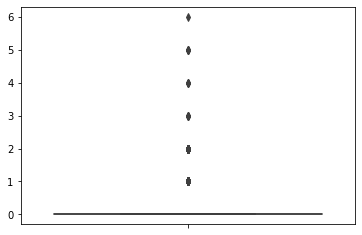

In [34]:
sns.boxplot(y=['Parch'],data=eda)

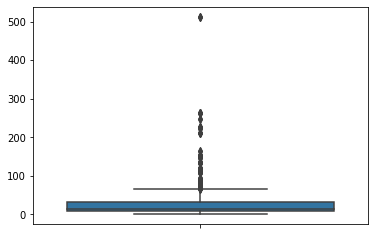

In [35]:
sns.boxplot(y=['Fare'],data=eda)

In [36]:
IQR=eda['Age'].quantile(0.75)-eda['Age'].quantile(0.25)
IQR

13.0

In [37]:
Upper_OutlierLimit_Age=eda['Age'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit_Age=eda['Age'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit_Age)
print(Lower_OutlierLimit_Age)

54.5
2.5


In [38]:
OutlierLimit_Age= eda[(eda['Age']>=Upper_OutlierLimit_Age) | (eda['Age']<=Lower_OutlierLimit_Age)]
OutlierLimit_Age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,male,2.00,3,1,21.0750,S
11,12,1,1,female,58.00,0,0,26.5500,S
15,16,1,2,female,55.00,0,0,16.0000,S
16,17,0,3,male,2.00,4,1,29.1250,Q
33,34,0,2,male,66.00,0,0,10.5000,S
54,55,0,1,male,65.00,0,1,61.9792,C
78,79,1,2,male,0.83,0,2,29.0000,S
94,95,0,3,male,59.00,0,0,7.2500,S
96,97,0,1,male,71.00,0,0,34.6542,C
116,117,0,3,male,70.50,0,0,7.7500,Q


In [39]:
eda['Age'] = np.where(eda['Age'] >Upper_OutlierLimit_Age,eda['Age'].quantile(0.95),eda['Age'])
eda['Age'] = np.where(eda['Age'] <Lower_OutlierLimit_Age,eda['Age'].quantile(0.05),eda['Age'])


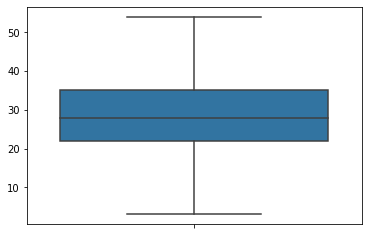

In [40]:
sns.boxplot(y=['Age'],data=eda)

In [41]:
IQR=eda['SibSp'].quantile(0.75)-eda['SibSp'].quantile(0.25)
IQR

1.0

In [42]:
Upper_OutlierLimit_SibSp=eda['SibSp'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit_SibSp=eda['SibSp'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit_SibSp)
print(Lower_OutlierLimit_SibSp)

2.5
-1.5


In [43]:
OutlierLimit_SibSp= eda[(eda['SibSp']>=Upper_OutlierLimit_SibSp) | (eda['SibSp']<=Lower_OutlierLimit_SibSp)]
OutlierLimit_SibSp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,male,6.0,3,1,21.0750,S
16,17,0,3,male,6.0,4,1,29.1250,Q
24,25,0,3,female,8.0,3,1,21.0750,S
27,28,0,1,male,19.0,3,2,263.0000,S
50,51,0,3,male,7.0,4,1,39.6875,S
59,60,0,3,male,11.0,5,2,46.9000,S
63,64,0,3,male,4.0,3,2,27.9000,S
68,69,1,3,female,17.0,4,2,7.9250,S
71,72,0,3,female,16.0,5,2,46.9000,S
85,86,1,3,female,33.0,3,0,15.8500,S


In [44]:
median = eda.loc[eda['SibSp']<2.5, 'SibSp'].median()
eda.loc[eda['SibSp'] > 2.5, 'SibSp'] = np.nan
eda.fillna(median,inplace=True)

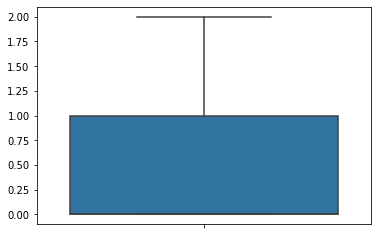

In [45]:
sns.boxplot(y=['SibSp'],data=eda)

In [46]:
IQR= eda['Parch'].quantile(0.75)-eda['Parch'].quantile(0.25)
IQR

0.0

In [47]:
Upper_OutlierLimit_Parch=eda['Parch'].quantile(0.75)+1.5*IQR
Lower_OutlierLimit_Parch=eda['Parch'].quantile(0.25)-1.5*IQR
print(Upper_OutlierLimit_Parch)
print(Lower_OutlierLimit_Parch)

0.0
0.0


In [48]:
OutlierLimit_Parch = eda[(eda['Parch']>=Upper_OutlierLimit_Parch) | (eda['Parch']<=Lower_OutlierLimit_Parch)]

In [49]:
OutlierLimit_Parch

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1.0,0,7.2500,S
1,2,1,1,female,38.0,1.0,0,71.2833,C
2,3,1,3,female,26.0,0.0,0,7.9250,S
3,4,1,1,female,35.0,1.0,0,53.1000,S
4,5,0,3,male,35.0,0.0,0,8.0500,S
5,6,0,3,male,28.0,0.0,0,8.4583,Q
6,7,0,1,male,54.0,0.0,0,51.8625,S
7,8,0,3,male,6.0,0.0,1,21.0750,S
8,9,1,3,female,27.0,0.0,2,11.1333,S
9,10,1,2,female,14.0,1.0,0,30.0708,C


In [50]:
median = eda.loc[eda['Parch']<1.5, 'Parch'].median()
eda.loc[eda.Parch > 1.5, 'Parch'] = np.nan
eda.fillna(median,inplace=True)

In [51]:
eda.drop(eda[eda['Parch']>0.8].index,inplace=True)

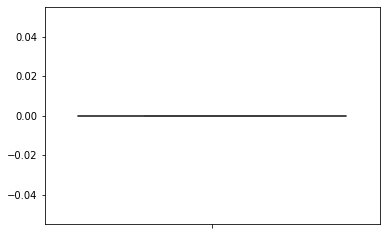

In [52]:
sns.boxplot(y=['Parch'],data=eda)

In [53]:
IOR_Fare= eda['Fare'].quantile(0.75)-eda['Fare'].quantile(0.25)

In [54]:
IOR_Fare

22.1042

In [55]:
Upper_OutlierLimit_Fare=eda['Fare'].quantile(0.75)+1.5*IOR_Fare
Lower_OutlierLimit_Fare=eda['Fare'].quantile(0.25)-1.5*IOR_Fare
print(Upper_OutlierLimit_Fare)
print(Lower_OutlierLimit_Fare)

63.1563
-25.2605


In [56]:
OutlierLimit_Fare = eda[(eda['Fare']>=Upper_OutlierLimit_Fare) | (eda['Fare']<=Lower_OutlierLimit_Fare)]

In [57]:
OutlierLimit_Fare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1.0,0.0,71.2833,C
27,28,0,1,male,19.0,0.0,0.0,263.0000,S
31,32,1,1,female,28.0,1.0,0.0,146.5208,C
34,35,0,1,male,28.0,1.0,0.0,82.1708,C
52,53,1,1,female,49.0,1.0,0.0,76.7292,C
61,62,1,1,female,38.0,0.0,0.0,80.0000,0 S\ndtype: object
62,63,0,1,male,45.0,1.0,0.0,83.4750,S
72,73,0,2,male,21.0,0.0,0.0,73.5000,S
88,89,1,1,female,23.0,0.0,0.0,263.0000,S
120,121,0,2,male,21.0,2.0,0.0,73.5000,S


In [58]:
eda['Fare']=np.where(eda['Fare']>Upper_OutlierLimit_Fare,eda['Fare'].quantile(0.87),eda['Fare'])
eda['Fare']=np.where(eda['Fare']<Lower_OutlierLimit_Fare,eda['Fare'].quantile(0.13),eda['Fare'])


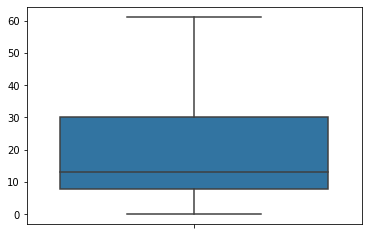

In [59]:
sns.boxplot(y=['Fare'],data=eda)

In [60]:
obj=eda.dtypes==np.object

In [61]:
obj

PassengerId    False
Survived       False
Pclass         False
Sex             True
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [62]:
eda.columns[obj]

Index(['Sex', 'Embarked'], dtype='object')

In [63]:
 dummydf = pd.DataFrame()  
 
for i in eda.columns[obj]:
    dummy=pd.get_dummies(eda[i], drop_first=True) 

    
dummydf=pd.concat([dummydf, dummy], axis=1) 
print(dummydf)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
5    0  1  0
6    0  0  1
8    0  0  1
9    1  0  0
11   0  0  1
12   0  0  1
13   0  0  1
14   0  0  1
15   0  0  1
17   0  0  1
18   0  0  1
19   1  0  0
20   0  0  1
21   0  0  1
22   0  1  0
23   0  0  1
25   0  0  1
26   1  0  0
27   0  0  1
28   0  1  0
29   0  0  1
30   1  0  0
31   1  0  0
32   0  1  0
33   0  0  1
..  .. .. ..
857  0  0  1
858  1  0  0
859  1  0  0
860  0  0  1
861  0  0  1
862  0  0  1
863  0  0  1
864  0  0  1
865  0  0  1
866  1  0  0
867  0  0  1
868  0  0  1
870  0  0  1
872  0  0  1
873  0  0  1
874  1  0  0
875  1  0  0
876  0  0  1
877  0  0  1
878  0  0  1
881  0  0  1
882  0  0  1
883  0  0  1
884  0  0  1
885  0  1  0
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[773 rows x 3 columns]


In [64]:
eda1=pd.concat([eda,dummydf],axis=1)

In [65]:
eda1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,male,22.0,1.0,0.0,7.2500,S,0,0,1
1,2,1,1,female,38.0,1.0,0.0,57.0000,C,1,0,0
2,3,1,3,female,26.0,0.0,0.0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1.0,0.0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0.0,0.0,8.0500,S,0,0,1
5,6,0,3,male,28.0,0.0,0.0,8.4583,Q,0,1,0
6,7,0,1,male,54.0,0.0,0.0,51.8625,S,0,0,1
8,9,1,3,female,27.0,0.0,0.0,11.1333,S,0,0,1
9,10,1,2,female,14.0,1.0,0.0,30.0708,C,1,0,0
11,12,1,1,female,54.0,0.0,0.0,26.5500,S,0,0,1


In [66]:
eda1.drop(['Embarked','Sex'],axis=1,inplace=True)

In [67]:
eda2=pd.get_dummies(eda,drop_first=True)

In [68]:
eda2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1.0,0.0,7.2500,1,0,0,1
1,2,1,1,38.0,1.0,0.0,57.0000,0,1,0,0
2,3,1,3,26.0,0.0,0.0,7.9250,0,0,0,1
3,4,1,1,35.0,1.0,0.0,53.1000,0,0,0,1
4,5,0,3,35.0,0.0,0.0,8.0500,1,0,0,1
5,6,0,3,28.0,0.0,0.0,8.4583,1,0,1,0
6,7,0,1,54.0,0.0,0.0,51.8625,1,0,0,1
8,9,1,3,27.0,0.0,0.0,11.1333,0,0,0,1
9,10,1,2,14.0,1.0,0.0,30.0708,0,1,0,0
11,12,1,1,54.0,0.0,0.0,26.5500,0,0,0,1
